# `SENTIMENT ANALYSIS - Movie Reviews Dataset`

## 1. Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
%matplotlib inline

## 2. Load Data

In [5]:
#nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

In [6]:
review = []
sentiment = []
for fileid in movie_reviews.fileids():
    review.append(movie_reviews.raw(fileid))
    sentiment.append(movie_reviews.categories(fileid)[0])

In [7]:
df = pd.DataFrame({'review': review, 'sentiment': sentiment})
df.head()

,review,sentiment
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [8]:
from wordcloud import WordCloud

In [9]:
words = " ".join(line.strip() for line in df.review)

In [10]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(words)

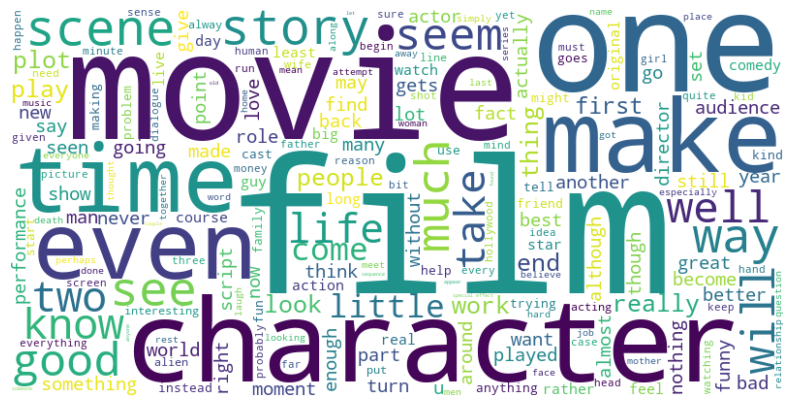

In [11]:
# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
# Split the DataFrame based on sentiment
positive_reviews = df[df['sentiment'] == 'pos']['review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 'neg']['review'].str.cat(sep=' ')

In [13]:
# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

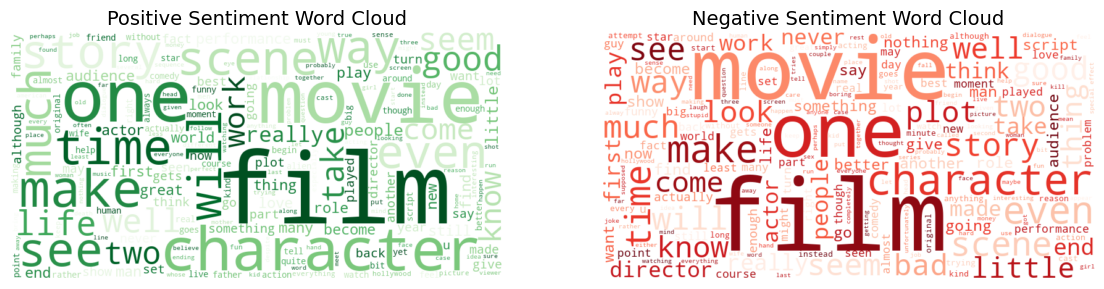

In [14]:
# Plot the word clouds
plt.figure(figsize=(14, 14))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Word Cloud", fontsize=14)

plt.show()

## 3. Missing Data Analysis 
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where missing values are present. 

In [16]:
# Printing total number of missing data
df.isnull().sum().sort_values(ascending=False)

review       0
sentiment    0
dtype: int64

## 4. Pandas Profiling Report

In [18]:
from ydata_profiling import ProfileReport 

In [19]:
pf = ProfileReport(df,explorative=True)

In [20]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Data Processing

In [22]:
df.describe()

,review,sentiment
count,2000,2000
unique,2000,2
top,"plot : two teen couples go to a church party ,...",neg
freq,1,1000


In [23]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
neg         1000   1000  plot : two teen couples go to a church party ,...   
pos         1000   1000  films adapted from comic books have had plenty...   

                
          freq  
sentiment       
neg          1  
pos          1

In [24]:
df['lenght'] = df['review'].apply(len)

In [25]:
df.head()

,review,sentiment,lenght
0,"plot : two teen couples go to a church party ,...",neg,4043
1,the happy bastard's quick movie review \ndamn ...,neg,1370
2,it is movies like these that make a jaded movi...,neg,2848
3,""" quest for camelot "" is warner bros . ' firs...",neg,2929
4,synopsis : a mentally unstable man undergoing ...,neg,4418


### 5.1 Stop Words, URLs, Numbers & Punctuations 
1. **Stop Words**: Remove common words (e.g., "the," "is") that may not add significant meaning.
2. **URLs**:  Handle or emove URLs in the text as they may not be useful for analysis.
3. **Numbers & Punctuations**: Decide whether to retain or remove numbers and punctuation marks.

In [27]:
#Download necessary NLTK resources
#nltk.download(stopwords)
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
#Load stop words
stop_words = set(stopwords.words('english'))

#Remove special characters(&, @, #, %) using translate 
remove_punctuation = str.maketrans('','',string.punctuation)

#Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters using translate
    text = text.translate(remove_punctuation)
    if isinstance(text, str):
        # Tokenize and remove stop words
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''

In [29]:
#Apply the cleaning function to the 'review' column in the DataFrame
df['cleaned_review'] = df['review'].apply(clean_text)

In [30]:
df.head()

,review,sentiment,lenght,cleaned_review
0,"plot : two teen couples go to a church party ,...",neg,4043,plot two teen couples go church party drink dr...
1,the happy bastard's quick movie review \ndamn ...,neg,1370,happy bastards quick movie review damn yk bug ...
2,it is movies like these that make a jaded movi...,neg,2848,movies like make jaded movie viewer thankful i...
3,""" quest for camelot "" is warner bros . ' firs...",neg,2929,quest camelot warner bros first featurelength ...
4,synopsis : a mentally unstable man undergoing ...,neg,4418,synopsis mentally unstable man undergoing psyc...


In [31]:
words = " ".join(line.strip() for line in df.cleaned_review)

In [32]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(words)

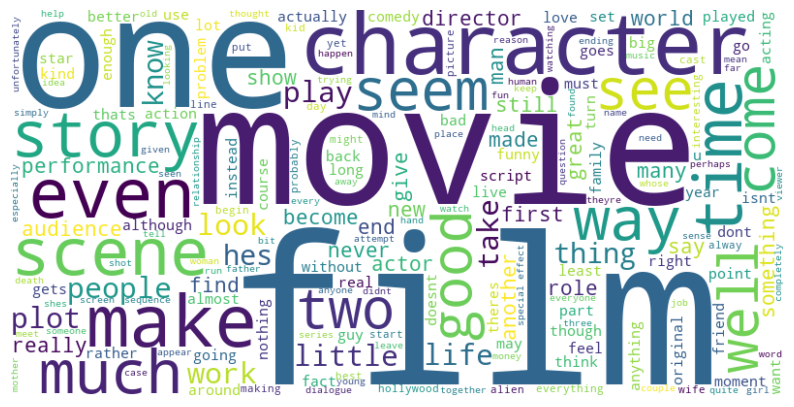

In [33]:
# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# Split the DataFrame based on sentiment
positive_reviews = df[df['sentiment'] == 'pos']['cleaned_review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 'neg']['cleaned_review'].str.cat(sep=' ')

In [35]:
# Generate word clouds for cleaned review
positive_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

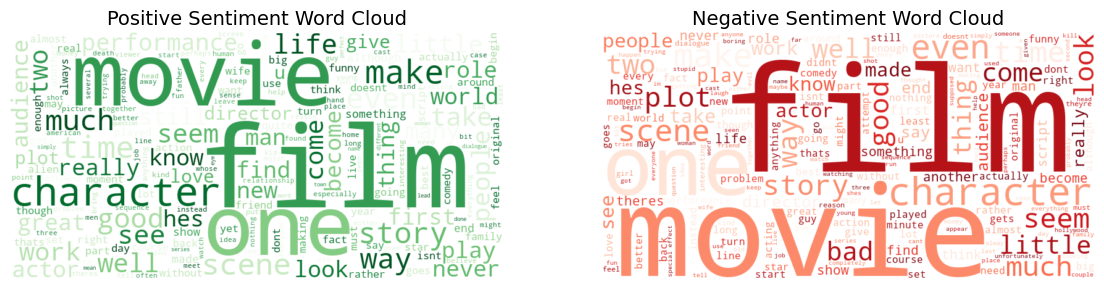

In [36]:
# Plot the word clouds for cleaned review
plt.figure(figsize=(14, 14))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Word Cloud", fontsize=14)

plt.show()

### 5.2 Tokenization

**Tokenization** is the process of splitting a text into individual units, typically words or sentences, known as **tokens**. It helps convert a string of text into manageable pieces for further analysis in NLP tasksemming.

In [38]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)
df['tokenized_review'] = df['cleaned_review'].apply(tokenize_text)

In [39]:
df.head()

,review,sentiment,lenght,cleaned_review,tokenized_review
0,"plot : two teen couples go to a church party ,...",neg,4043,plot two teen couples go church party drink dr...,"[plot, two, teen, couples, go, church, party, ..."
1,the happy bastard's quick movie review \ndamn ...,neg,1370,happy bastards quick movie review damn yk bug ...,"[happy, bastards, quick, movie, review, damn, ..."
2,it is movies like these that make a jaded movi...,neg,2848,movies like make jaded movie viewer thankful i...,"[movies, like, make, jaded, movie, viewer, tha..."
3,""" quest for camelot "" is warner bros . ' firs...",neg,2929,quest camelot warner bros first featurelength ...,"[quest, camelot, warner, bros, first, featurel..."
4,synopsis : a mentally unstable man undergoing ...,neg,4418,synopsis mentally unstable man undergoing psyc...,"[synopsis, mentally, unstable, man, undergoing..."


### 5.3 Stemming
**Stemming** reduces words to their base or root form by removing suffixes. It may not produce actual words but helps in simplifying the word forms (e.g., "running" becomes "run").

In [41]:
#Stemming using PorterStemmer
from nltk.stem import PorterStemmer
def stem_text(text_tokens):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text_tokens]
df['stemmed_review'] = df['tokenized_review'].apply(stem_text)

In [42]:
df.head()

,review,sentiment,lenght,cleaned_review,tokenized_review,stemmed_review
0,"plot : two teen couples go to a church party ,...",neg,4043,plot two teen couples go church party drink dr...,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr..."
1,the happy bastard's quick movie review \ndamn ...,neg,1370,happy bastards quick movie review damn yk bug ...,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, yk..."
2,it is movies like these that make a jaded movi...,neg,2848,movies like make jaded movie viewer thankful i...,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ..."
3,""" quest for camelot "" is warner bros . ' firs...",neg,2929,quest camelot warner bros first featurelength ...,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele..."
4,synopsis : a mentally unstable man undergoing ...,neg,4418,synopsis mentally unstable man undergoing psyc...,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych..."


### 5.4 Lemmatization
**Lemmatization** converts words to their base or dictionary form, called a **lemma**, while considering the context and meaning (e.g., "running" becomes "run", "better" becomes "good"). It is more accurate than stemming.

In [44]:
#Lemmatization using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text_tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text_tokens]
df['lemmatized_review'] = df['tokenized_review'].apply(lemmatize_text)

In [45]:
df.head()

,review,sentiment,lenght,cleaned_review,tokenized_review,stemmed_review,lemmatized_review
0,"plot : two teen couples go to a church party ,...",neg,4043,plot two teen couples go church party drink dr...,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr...","[plot, two, teen, couple, go, church, party, d..."
1,the happy bastard's quick movie review \ndamn ...,neg,1370,happy bastards quick movie review damn yk bug ...,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, yk...","[happy, bastard, quick, movie, review, damn, y..."
2,it is movies like these that make a jaded movi...,neg,2848,movies like make jaded movie viewer thankful i...,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ...","[movie, like, make, jaded, movie, viewer, than..."
3,""" quest for camelot "" is warner bros . ' firs...",neg,2929,quest camelot warner bros first featurelength ...,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele...","[quest, camelot, warner, bros, first, featurel..."
4,synopsis : a mentally unstable man undergoing ...,neg,4418,synopsis mentally unstable man undergoing psyc...,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych...","[synopsis, mentally, unstable, man, undergoing..."


## 6. Spliting the dataset into Train & Test

In [47]:
y = df['sentiment']
X = df.drop(columns=['sentiment'])

In [48]:
# Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [49]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (1600, 6)
X_test (400, 6)
y_train (1600,)
y_test (400,)


## 7. Feature Extraction

### 7.1 Document-Term Matrix (DTM)
A **Document-Term Matrix (DTM)** is a matrix where each row represents a document, and each column represents a word (or term). The matrix contains the **frequency** (count) of each word in each document, allowing for easy comparison of word occurrences across multiple documents.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [53]:
X_train_dtm = count_vectorizer.fit_transform(X_train['cleaned_review'])
X_test_dtm = count_vectorizer.transform(X_test['cleaned_review'])

In [54]:
# Convert the result to a DataFrame
X_train_dtm_df = pd.DataFrame(X_train_dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
X_test_dtm_df = pd.DataFrame(X_test_dtm.toarray(), columns=count_vectorizer.get_feature_names_out())

In [55]:
X_train_dtm_df.head()

,aa,aaa,aaaaaaaahhhh,aaaaaah,aahs,aaliyah,aaliyahs,aalyah,aalyahs,aameetings,...,zuckerabrahamszucker,zuehlke,zuko,zukovsky,zulu,zundel,zwick,zwicks,zwigoffs,zycie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7.2 TF-IDF (Term Frequency-Inverse Document Frequency)
**TF-IDF** is a statistical measure that evaluates how important a word is to a document within a collection. It calculates:
- **Term Frequency (TF)**: How often a word appears in a document.
- **Inverse Document Frequency (IDF)**: How rare or unique the word is across all documents. It helps reduce the importance of common words and highlights unique, important terms in the document.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [58]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['cleaned_review'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['cleaned_review'])

In [59]:
# Convert the result to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [60]:
X_train_tfidf_df.head()

,aa,aaa,aaaaaaaahhhh,aaaaaah,aahs,aaliyah,aaliyahs,aalyah,aalyahs,aameetings,...,zuckerabrahamszucker,zuehlke,zuko,zukovsky,zulu,zundel,zwick,zwicks,zwigoffs,zycie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Target Transformation
When transforming categorical variables (e.g., "pos" and "neg") into numerical values (e.g., 1 for positive and 0 for negative), this is known as label encoding or target encoding.

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [63]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [64]:
y_train

array([0, 0, 1, ..., 1, 0, 0])

## 9. Modeling

### 9.1 Logistic Regression Model

#### 9.1.1 Building a Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [70]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

#### 9.1.2 Model Evaluation

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.1.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [74]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.845

##### 9.1.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [76]:
precision = precision_score(y_test,y_pred)
precision

0.822429906542056

##### 9.1.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [78]:
recall = recall_score(y_test,y_pred)
recall

0.88

##### 9.1.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [80]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.81

##### 9.1.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [82]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [83]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.845

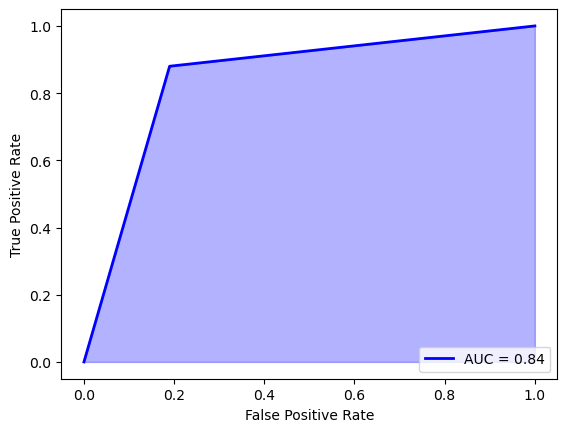

In [84]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.1.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [86]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[162  38]
 [ 24 176]]


In [87]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,162,38
1,24,176


Text(0.5, 1.0, 'Confusion Matrix')

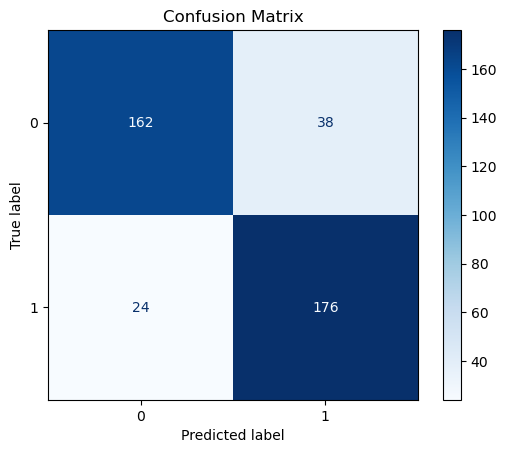

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.1.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       200
           1       0.82      0.88      0.85       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



### 9.2 Naive Bayes Model

#### 9.2.1 Building a Naive Bayes Model

In [93]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [94]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [95]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

#### 9.2.2 Model Evaluation

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.2.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [99]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.825

##### 9.2.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [101]:
precision = precision_score(y_test,y_pred)
precision

0.8316326530612245

##### 9.2.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [103]:
recall = recall_score(y_test,y_pred)
recall

0.815

##### 9.2.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [105]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.835

##### 9.2.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [107]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [108]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.825

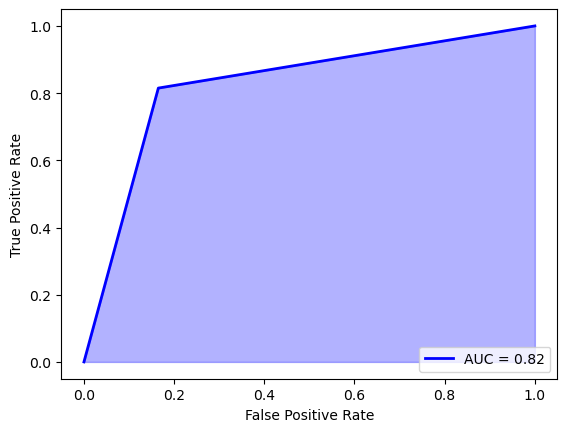

In [109]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.2.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [111]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[167  33]
 [ 37 163]]


In [112]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,167,33
1,37,163


Text(0.5, 1.0, 'Confusion Matrix')

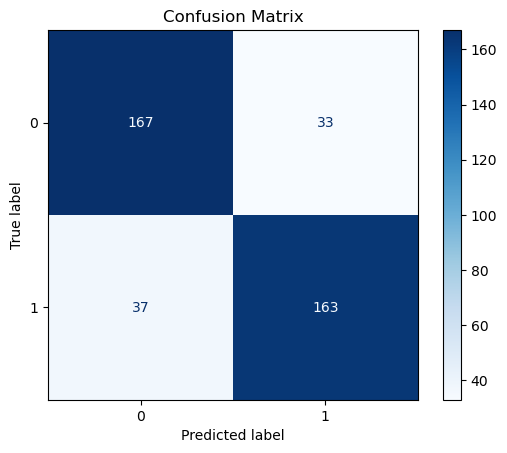

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.2.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       200
           1       0.83      0.81      0.82       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



### 9.3 Support Vector Machines(SVM) Model

#### 9.3.1 Building a Support Vector Machines(SVM) Model

In [118]:
from sklearn.svm import SVC
model = SVC()

In [119]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

SVC()

In [120]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

#### 9.3.2 Model Evaluation

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.3.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [124]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8475

##### 9.3.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [126]:
precision = precision_score(y_test,y_pred)
precision

0.8262910798122066

##### 9.3.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [128]:
recall = recall_score(y_test,y_pred)
recall

0.88

##### 9.3.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [130]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.815

##### 9.3.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [132]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [133]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.8474999999999999

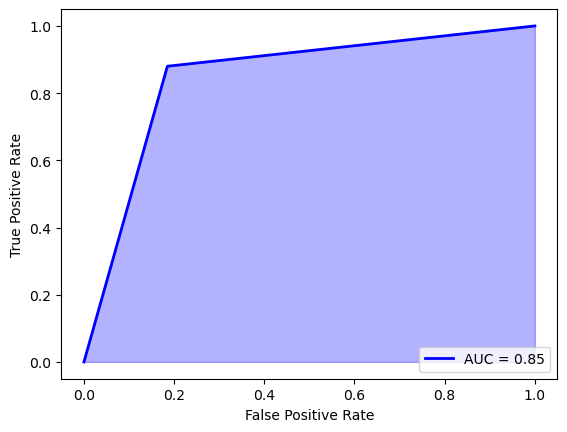

In [134]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.3.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [136]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[163  37]
 [ 24 176]]


In [137]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,163,37
1,24,176


Text(0.5, 1.0, 'Confusion Matrix')

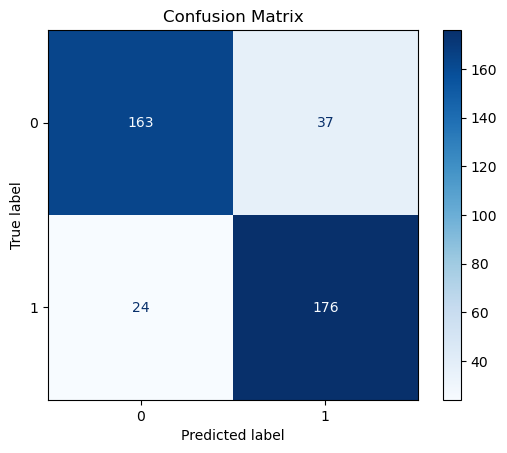

In [138]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.3.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       200
           1       0.83      0.88      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



### 9.4 Decision Trees Model

#### 9.4.1 Building a Decision Trees Model

In [143]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [144]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [145]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

#### 9.4.2 Model Evaluation

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.4.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [149]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6625

##### 9.4.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [151]:
precision = precision_score(y_test,y_pred)
precision

0.6555023923444976

##### 9.4.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [153]:
recall = recall_score(y_test,y_pred)
recall

0.685

##### 9.4.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [155]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.64

##### 9.4.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [157]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [158]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.6625

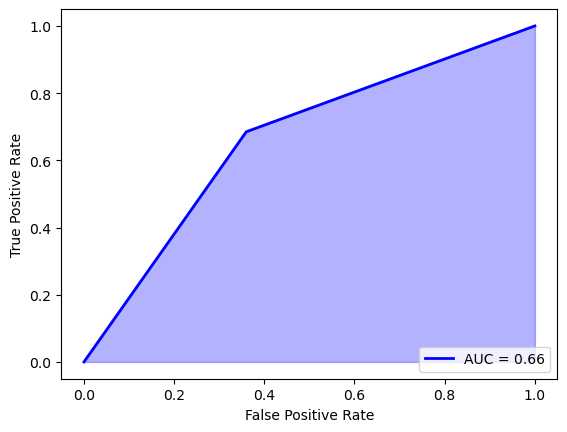

In [159]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.4.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [161]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[128  72]
 [ 63 137]]


In [162]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,128,72
1,63,137


Text(0.5, 1.0, 'Confusion Matrix')

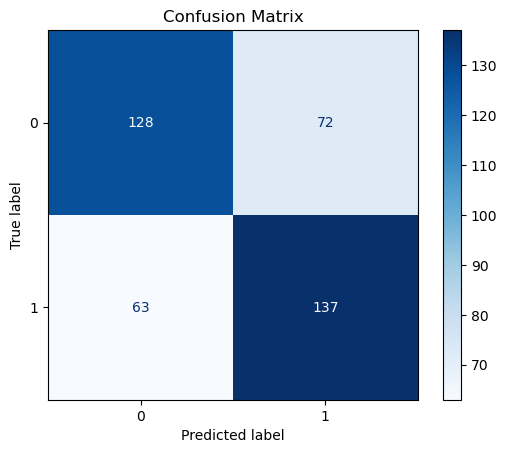

In [163]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.4.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       200
           1       0.66      0.69      0.67       200

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400



### 9.5 Random Forest Model

#### 9.5.1 Building a Random Forest Model

In [168]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [169]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [170]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

#### 9.5.2 Model Evaluation

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.5.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [174]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.795

##### 9.5.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [176]:
precision = precision_score(y_test,y_pred)
precision

0.8390804597701149

##### 9.5.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [178]:
recall = recall_score(y_test,y_pred)
recall

0.73

##### 9.5.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [180]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.86

##### 9.5.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [182]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [183]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.795

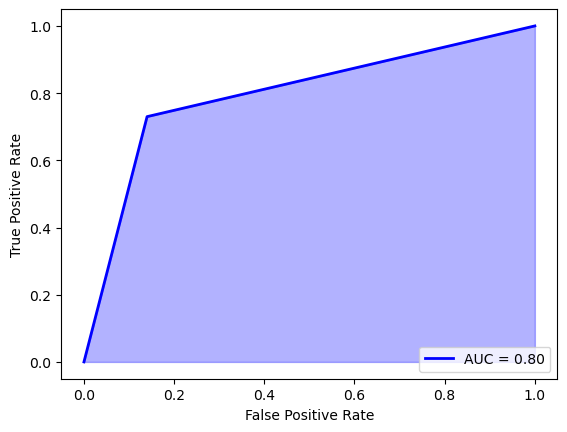

In [184]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.2.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [186]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[172  28]
 [ 54 146]]


In [187]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,172,28
1,54,146


Text(0.5, 1.0, 'Confusion Matrix')

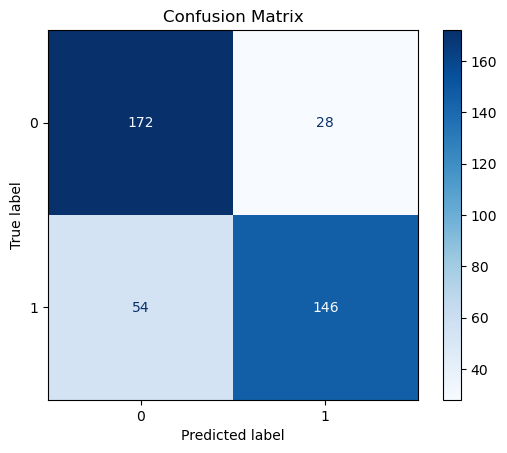

In [188]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.5.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       200
           1       0.84      0.73      0.78       200

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.79       400



### 9.6 K-Nearest Neighbors (KNN) Model

#### 9.6.1 Building a K-Nearest Neighbors (KNN) Model

In [193]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [194]:
# Fit the model to the training data
model.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [195]:
#Predictions 
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,

#### 9.6.2 Model Evaluation

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

##### 9.6.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [199]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6625

##### 9.6.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [201]:
precision = precision_score(y_test,y_pred)
precision

0.6444444444444445

##### 9.6.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [203]:
recall = recall_score(y_test,y_pred)
recall

0.725

##### 9.6.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [205]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.6

##### 9.6.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [207]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [208]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.6625

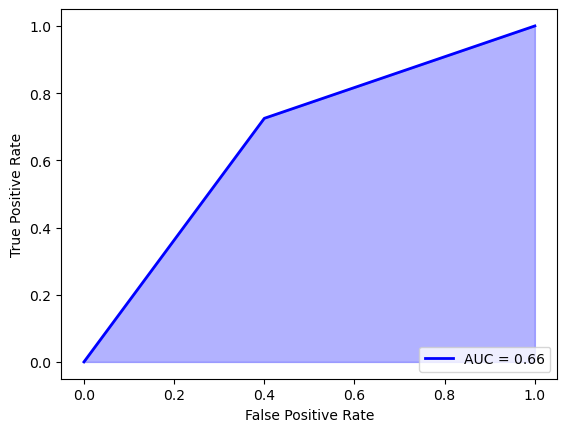

In [209]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

##### 9.6.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [211]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[120  80]
 [ 55 145]]


In [212]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,120,80
1,55,145


Text(0.5, 1.0, 'Confusion Matrix')

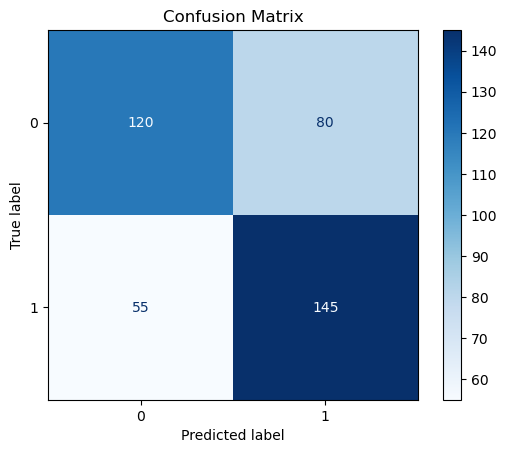

In [213]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

##### 9.6.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       200
           1       0.64      0.72      0.68       200

    accuracy                           0.66       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.67      0.66      0.66       400

